In [342]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# import OpenCV
import cv2

In [343]:
template = cv2.imread('../Data/28_AP_0.14.tif') # Read template image
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY) # Color to Grayscale

In [344]:
# Image plotting function
def plot_image(image, gray=True):
    plt.figure(figsize=(10,7))
    if gray:
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(image)
    plt.grid('off')
    plt.show()

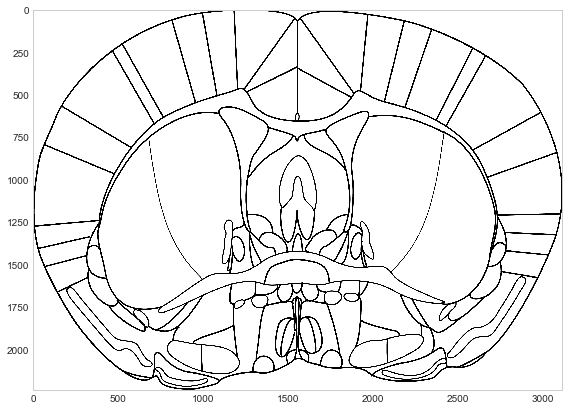

In [345]:
# Plot template image
plot_image(template)

In [346]:
# Invert template color to highlight the edges
template_inv = cv2.bitwise_not(template)

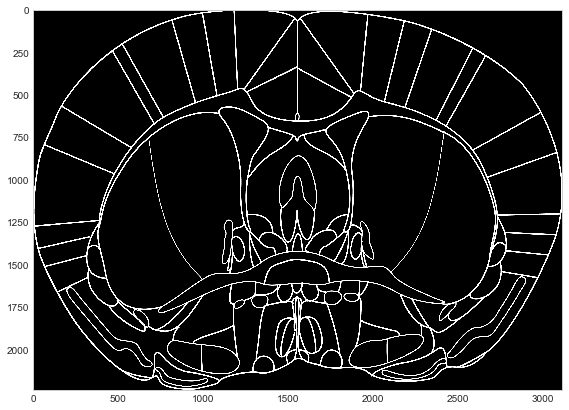

In [347]:
plot_image(template_inv)

In [440]:
img_color = cv2.imread('../Data/20170914_D2CreAi14_M527_G_RB_pDMS_S1P2_R1C3_001.tif') # Read base image
img_color = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB) # Convert BGR (OpenCV) to RGB (matplotlib) for plotting
img = cv2.cvtColor(img_color, cv2.COLOR_RGB2GRAY) # Convert to grayscale

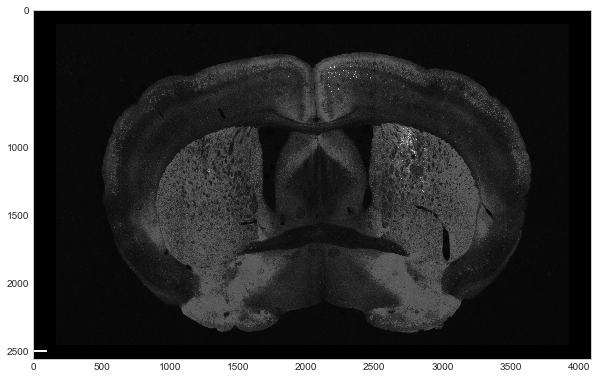

In [441]:
# Plot base image
plot_image(img)

In [488]:
# Reduce image size (downsample) for 
height, width = img.shape
img_down = cv2.resize(img,(int(0.1*width), int(0.1*height)), interpolation = cv2.INTER_AREA)

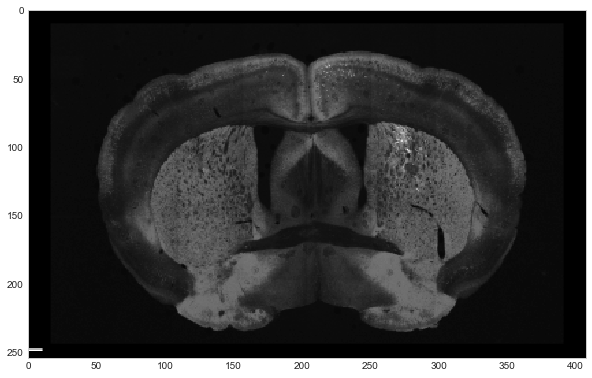

In [489]:
# Plot shrinked image
plot_image(img_down)

## Edge detection

In [490]:
# Morphological transforms for filling empty spaces in stained image
kernel = np.ones((3,3),np.uint8)
img_down = cv2.dilate(img_down, kernel, iterations = 2)
img_down = cv2.erode(img_down, kernel, iterations = 2)

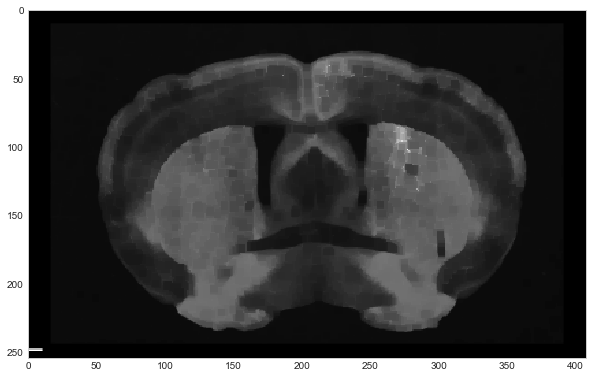

In [491]:
plot_image(img_down)

In [506]:
# Extract edges using Canny edge detector (pixel-wise edge detector)
edges = cv2.Canny(img_down,20,100)

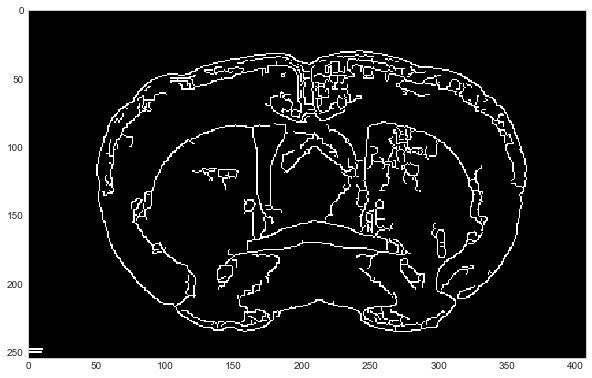

In [507]:
plot_image(edges)

In [510]:
# Upscale the image with edges to original resolution
edges = cv2.resize(edges,(width, height), interpolation = cv2.INTER_CUBIC)

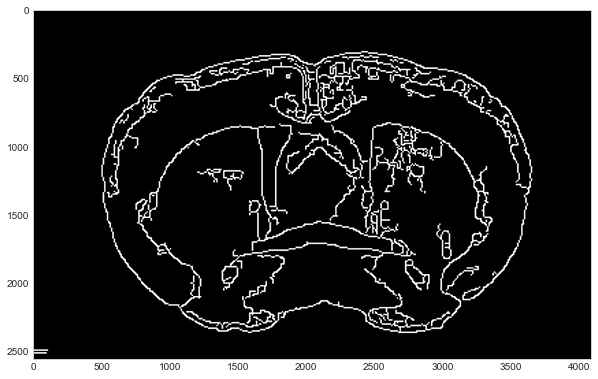

In [511]:
plot_image(edges)

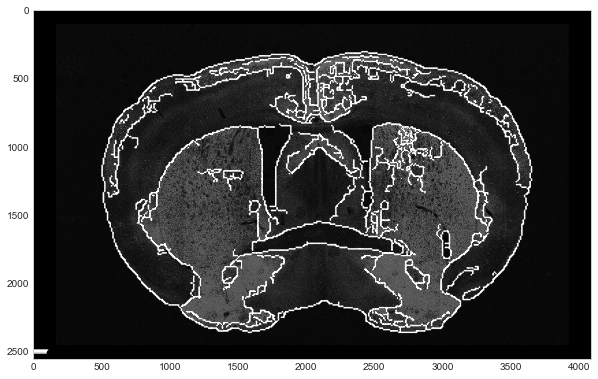

In [525]:
# Check fit
out = edges | img
plot_image(out)